# Machine Learning 29: Random Forest Classification

### 1. What Is Random Forest Classification?

Random Forest Classification is an **ensemble learning method** that builds multiple decision trees and combines their outputs to classify data points. It’s especially powerful for handling complex datasets with nonlinear relationships and noisy features.

### 2. Core Concepts

- **Decision Tree Classifier**: A tree structure that splits data based on feature values to assign class labels.
- **Ensemble Learning**: Combines multiple models to improve performance.
- **Bagging (Bootstrap Aggregating)**: Each tree is trained on a random subset of the data.
- **Random Feature Selection**: At each split, only a random subset of features is considered—this adds diversity and reduces correlation among trees.

### 3. How It Works (Step-by-Step)

1. **Bootstrap Sampling**: Create multiple datasets by sampling with replacement from the original training set.
2. **Tree Construction**:
   - For each dataset, build a decision tree.
   - At each node, randomly select a subset of features to find the best split.
3. **Prediction**:
   - Each tree votes for a class label.
   - The final prediction is the **majority vote** across all trees.

### 4. Key Hyperparameters

| Parameter             | Description |
|----------------------|-------------|
| `n_estimators`        | Number of trees in the forest |
| `max_features`        | Number of features to consider at each split |
| `max_depth`           | Maximum depth of each tree |
| `min_samples_split`   | Minimum samples required to split a node |
| `min_samples_leaf`    | Minimum samples required at a leaf node |
| `bootstrap`           | Whether to use bootstrapped samples |

### 5. Evaluation Metrics

For classification tasks, common metrics include:

- **Accuracy**
- **Precision, Recall, F1-Score**
- **Confusion Matrix**
- **ROC-AUC Score**

### 6. Advantages

- Handles high-dimensional data well
- Resistant to overfitting (especially with enough trees)
- Works with both categorical and numerical features
- Provides **feature importance** scores

### 7. Limitations

- Can be slow with large datasets and many trees
- Less interpretable than a single decision tree
- May struggle with imbalanced datasets (can be mitigated with class weighting or sampling)

### 8. Practical Tips

- Use **Grid Search** or **Random Search** to tune hyperparameters.
- Consider **class weights** or **SMOTE** for imbalanced classes.
- Use **Out-of-Bag (OOB) error** as a built-in validation metric.

### 9. Intuition

Imagine asking 100 friends to guess whether a fruit is an apple or a pear based on its color, shape, and texture. Each friend uses slightly different criteria. The final decision is based on the majority vote. That’s Random Forest Classification in action.


In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# load the data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# encode features which are categorical or object using for loop
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [4]:
# split the data into X and y for classification
X = df.drop('sex', axis = 1)
y = df['sex']

In [5]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [6]:
# create, train and predict the mode
model_cl = RandomForestClassifier(n_estimators=200, random_state=42)
model_cl.fit(X_train, y_train)
y_pred = model_cl.predict(X_test)

In [7]:
#evaluate the model
print('accuracy score: ', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

accuracy score:  0.6122448979591837
confusion matrix:
 [[ 7 12]
 [ 7 23]]
classification report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.66      0.77      0.71        30

    accuracy                           0.61        49
   macro avg       0.58      0.57      0.57        49
weighted avg       0.60      0.61      0.60        49



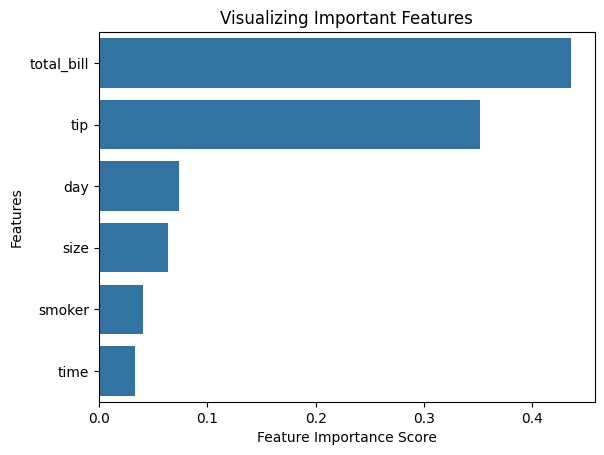

In [ ]:
# visualize the feature importance
feature_imp = pd.Series(model_cl.feature_importances_, index=df.drop('sex', axis=1).columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()